# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# I have searched for a suitable dataset on quandl but cannot find one so will instead use my dataframe

In [3]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Achievement 6'

In [238]:
#Import Dataframe
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Emissions Life Expectancy merged.csv'), index_col = False)

In [239]:
df . head()

Unnamed: 0      Country country_code  Year  Total  Coal  Oil  Gas  Cement  \
0           0  Afghanistan          AFG  1750    0.0   0.0  0.0  0.0     0.0   
1           1  Afghanistan          AFG  1751    0.0   0.0  0.0  0.0     0.0   
2           2  Afghanistan          AFG  1752    0.0   0.0  0.0  0.0     0.0   
3           3  Afghanistan          AFG  1753    0.0   0.0  0.0  0.0     0.0   
4           4  Afghanistan          AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  Life Expectancy Life Expectancy category  
0      0.0    0.0         0.0              NaN                      NaN  
1      0.0    0.0         0.0              NaN                      NaN  
2      0.0    0.0         0.0              NaN                      NaN  
3      0.0    0.0         0.0              NaN                      NaN  
4      0.0    0.0         0.0              NaN                      NaN

In [240]:
df = df.drop('Unnamed: 0', axis=1)

In [241]:
df . head()

Country country_code  Year  Total  Coal  Oil  Gas  Cement  Flaring  \
0  Afghanistan          AFG  1750    0.0   0.0  0.0  0.0     0.0      0.0   
1  Afghanistan          AFG  1751    0.0   0.0  0.0  0.0     0.0      0.0   
2  Afghanistan          AFG  1752    0.0   0.0  0.0  0.0     0.0      0.0   
3  Afghanistan          AFG  1753    0.0   0.0  0.0  0.0     0.0      0.0   
4  Afghanistan          AFG  1754    0.0   0.0  0.0  0.0     0.0      0.0   

   Other  Per Capita  Life Expectancy Life Expectancy category  
0    0.0         0.0              NaN                      NaN  
1    0.0         0.0              NaN                      NaN  
2    0.0         0.0              NaN                      NaN  
3    0.0         0.0              NaN                      NaN  
4    0.0         0.0              NaN                      NaN

In [242]:
# filter the rows by year and country
subset = df.query('Year >= 1960 and Year <= 2020 and Country == "United Kingdom"')
# display the subset
print(subset) 

              Country country_code  Year       Total        Coal         Oil  \
55494  United Kingdom          GBR  1960  584.020018  448.052240  129.145008   
55495  United Kingdom          GBR  1961  588.614801  442.882336  138.477216   
55496  United Kingdom          GBR  1962  592.931499  437.313056  148.359024   
55497  United Kingdom          GBR  1963  603.385663  439.306534  156.840922   
55498  United Kingdom          GBR  1964  607.865989  426.243017  172.725665   
...               ...          ...   ...         ...         ...         ...   
55550  United Kingdom          GBR  2016  399.430131   47.824616  173.930280   
55551  United Kingdom          GBR  2017  387.367141   39.128801  174.850612   
55552  United Kingdom          GBR  2018  379.729755   33.280249  173.087118   
55553  United Kingdom          GBR  2019  364.753306   24.512705  168.995529   
55554  United Kingdom          GBR  2020  326.263199   22.809405  143.980921   

              Gas    Cement   Flaring  

In [243]:
# drop the columns by name, except the ones you want to keep
subset = subset.drop(columns=subset.columns.difference(['Year', 'Life Expectancy']))

In [244]:
subset . head()

Year  Life Expectancy
55494  1960        71.126829
55495  1961        70.878049
55496  1962        70.926829
55497  1963        70.826829
55498  1964        71.624390

# Subsetting

In [245]:
type (df)

pandas.core.frame.DataFrame

In [246]:
# Set the "Year" column as the index

from datetime import datetime

subset.set_index('Year', inplace=True)

In [247]:
subset . head()

Life Expectancy
Year                 
1960        71.126829
1961        70.878049
1962        70.926829
1963        70.826829
1964        71.624390

In [248]:
subset . shape

(61, 1)

In [249]:
subset . columns

Index(['Life Expectancy'], dtype='object')

In [250]:
type(subset)

pandas.core.frame.DataFrame

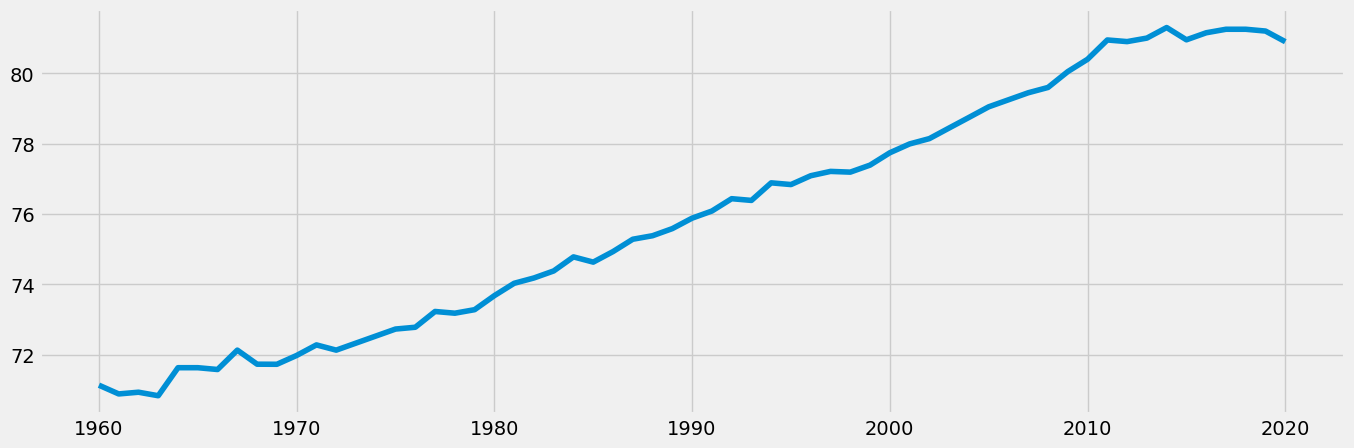

In [251]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(subset)

# 2.  wrangling, and cleaning time-series data

In [252]:
# Reset index to use the "Year" column as a filter

subset_2 = subset.reset_index()

In [253]:
subset_2.head()

Year  Life Expectancy
0  1960        71.126829
1  1961        70.878049
2  1962        70.926829
3  1963        70.826829
4  1964        71.624390

In [254]:
# convert the string value to an integer
start_year = int('1980-01-01'[:4]) # get the first four characters of the string and convert to int
end_year = int('2020-06-01'[:4]) # get the first four characters of the string and convert to int
# filter the rows by year range
data_sub = subset_2.loc[(subset_2['Year'] >= start_year) & (subset_2['Year'] < end_year)]

In [255]:
data_sub.shape


(40, 2)

In [256]:
data_sub.head()

Year  Life Expectancy
20  1980        73.675610
21  1981        74.026829
22  1982        74.178049
23  1983        74.378049
24  1984        74.778049

In [257]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [258]:
## Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 


Year               0
Life Expectancy    0
dtype: int64

##no missing values

In [259]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [260]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [262]:
data_sub['Year'] = pd.to_datetime(df['Year'])
data_sub.set_index('Year', inplace=True)

In [263]:
subset_1['Year'] = subset_1['Year'].astype(str) # convert the 'Year' column to a string type 
subset_1 = subset_1.loc[(subset_1['Year'] >= '1960') & (subset_1['Year'] < '2020')] # filter by string values

In [264]:
subset_1.shape

(60, 2)

In [265]:
subset_1.head()

Year  Per Capita
0  1960   11.115083
1  1961   11.135090
2  1962   11.148759
3  1963   11.276442
4  1964   11.285723

In [269]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

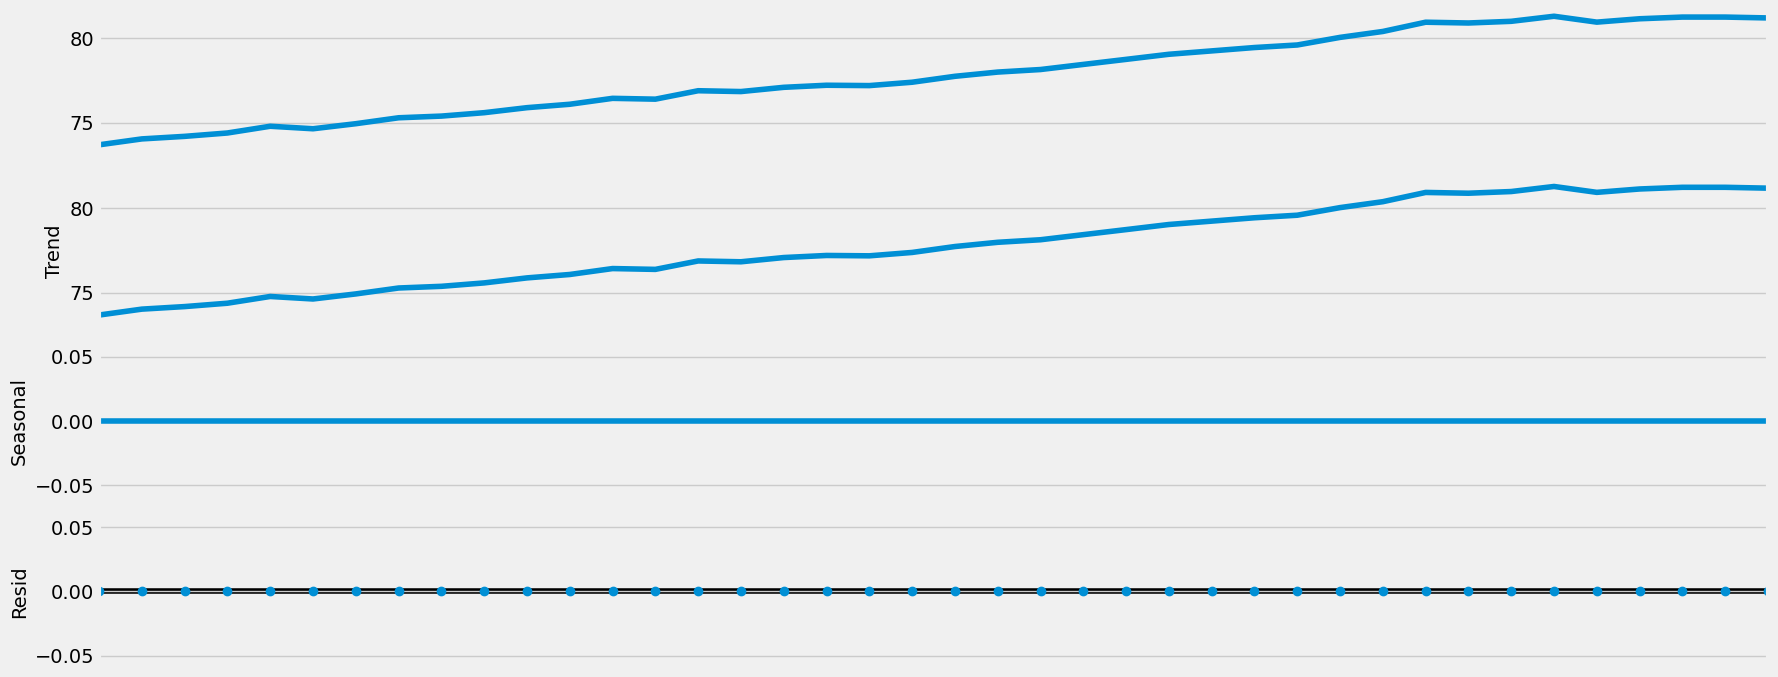

In [270]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [276]:
subset_1 . columns

Index(['Year', 'Per Capita'], dtype='object')

In [278]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(subset_1['Per Capita'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.258277
p-value                         0.996365
Number of Lags Used             0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


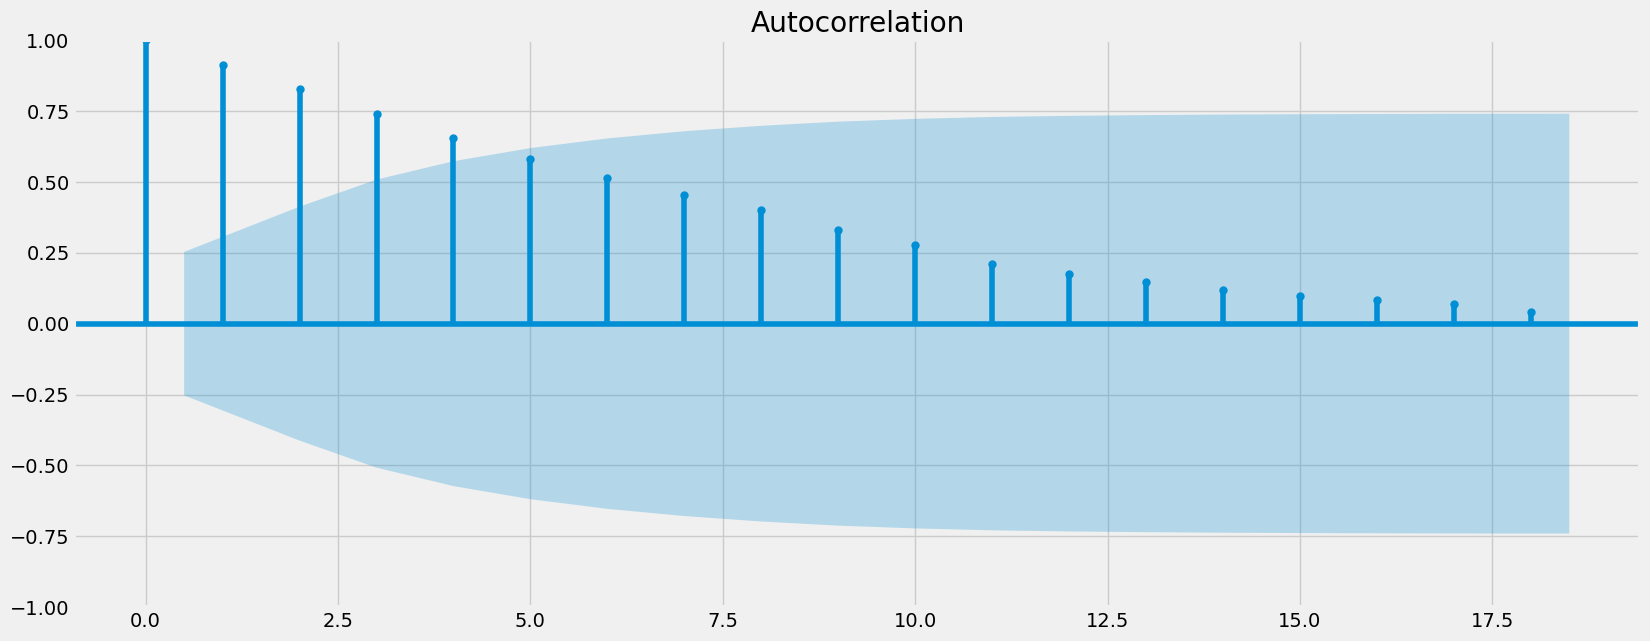

In [280]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(subset_1['Per Capita'])
plt.show()

In [282]:
# Based on these results, i can conclude that the data is non-stationary, because the test statistic is greater than the critical values, and the p-value is close to 1. This means that you cannot reject the null hypothesis that the data has a unit root,

# Stationarising

In [284]:
# Check the data types of subset_1
print(subset_1.dtypes)

Year           object
Per Capita    float64
dtype: object


In [286]:
# Convert the Year column to integer values
subset_1['Year'] = pd.to_numeric(subset_1['Year'], errors='coerce')

# Check the data types of subset_1 again
print(subset_1.dtypes)

Year            int64
Per Capita    float64
dtype: object


In [287]:
data_diff = subset_1 - subset_1.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [288]:
data_diff.dropna(inplace = True) # Here, i remove the missing values that came about as a result of the differencing. 
# i need to remove these or i won't be able to run the Dickey-Fuller test.

In [290]:
data_diff.columns

Index(['Year', 'Per Capita'], dtype='object')

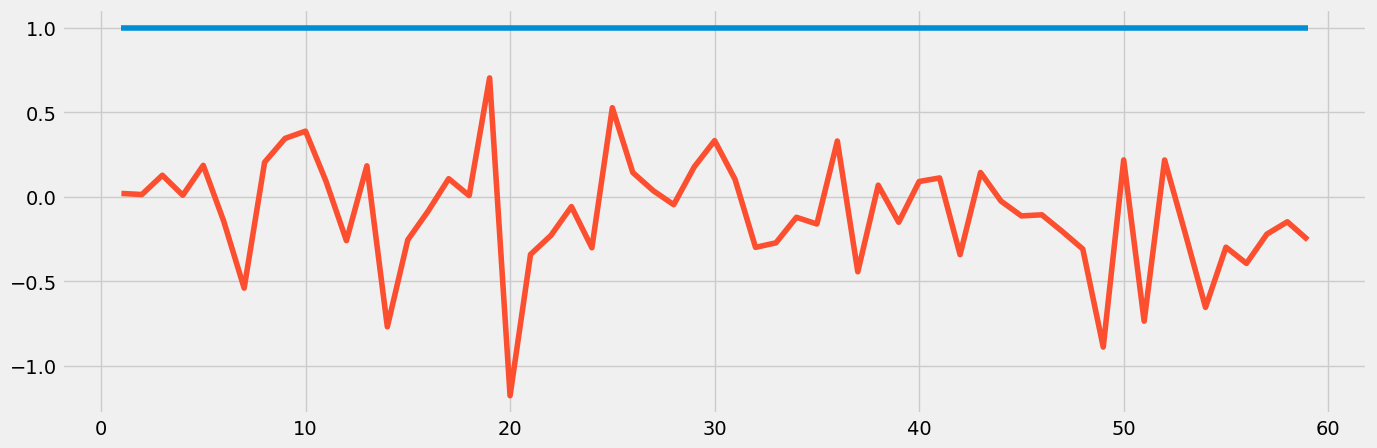

In [291]:
# CWhat the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [293]:
dickey_fuller(data_diff['Per Capita'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.023497e+00
p-value                        2.046399e-12
Number of Lags Used            0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


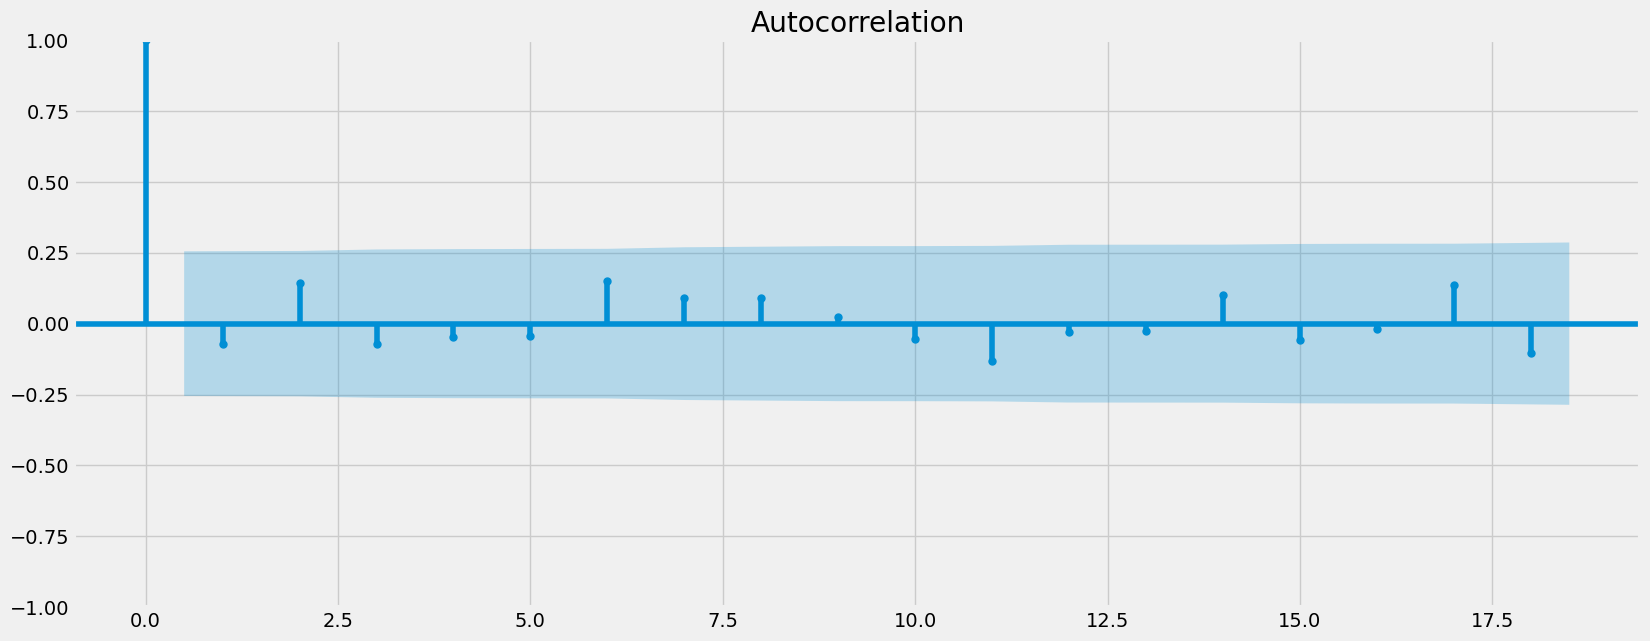

In [296]:
plot_acf(data_diff['Per Capita'])
plt.show()

Data is now stationary